analyze NBA results provided by FiveThirtyEight in a 17MB CSV file. 
Create a script download_nba_all_elo.py to download the data

When I excute the script, it will save the file nba_all_elo.csv in your current working directory.

In [0]:
import requests

download_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv"
target_csv_path = "nba_all_elo.csv"

response = requests.get(download_url)
# raise_for_status()		If an error occur, this method returns a HTTPError object
response.raise_for_status()    # Check that the request was successful
# We can use with statement in Python such that we don’t have to 
# close the file handler. The with statement creates a context manager and it will automatically close 
# the file handler for you when you are done with it.
# "wb" write binary mode
with open(target_csv_path, "wb") as f:
# .content		Returns the content of the response, in bytes
# save the file nba_all_elo.csv in your current working directory
   f.write(response.content)

print("Download ready.")

Download ready.


I use pd.read_csv to read my dataset and store it as a DataFrame object. similar functions like read_json(), read_html(), and read_sql_table(). 


In [0]:
import pandas as pd
nba=pd.read_csv("nba_all_elo.csv")
type(nba)

pandas.core.frame.DataFrame

In [0]:
len(nba)

126314

len() to determine the number of row
 .shape attribute of the DataFrame to see its dimensionality. The result is a tuple containing the number of rows and columns.

In [0]:
nba.shape

(126314, 23)

You can configure Pandas to display all 23 columns like this:

In [0]:
pd.set_option("display.max_column",None)

In [0]:
nba.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.00,1293.28,40.29,NYK,Knicks,68,1300.00,1306.72,H,L,0.64,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.00,1306.72,41.71,TRH,Huskies,66,1300.00,1293.28,A,W,0.36,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.00,1309.65,42.01,NYK,Knicks,47,1306.72,1297.07,H,W,0.63,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.72,1297.07,40.69,CHS,Stags,63,1300.00,1309.65,A,L,0.37,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.00,1279.62,38.86,WSC,Capitols,50,1300.00,1320.38,H,L,0.64,NaN


In [0]:
pd.set_option("display.precision", 2)

In [0]:
nba.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.00,1293.28,40.29,NYK,Knicks,68,1300.00,1306.72,H,L,0.64,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.00,1306.72,41.71,TRH,Huskies,66,1300.00,1293.28,A,W,0.36,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.00,1309.65,42.01,NYK,Knicks,47,1306.72,1297.07,H,W,0.63,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.72,1297.07,40.69,CHS,Stags,63,1300.00,1309.65,A,L,0.37,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.00,1279.62,38.86,WSC,Capitols,50,1300.00,1320.38,H,L,0.64,NaN


In [0]:
nba.tail(3)

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.39,1700.74,60.01,GSW,Warriors,104,1809.98,1813.63,A,L,0.23,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.74,1692.09,59.29,GSW,Warriors,105,1813.63,1822.29,H,L,0.48,NaN
126313,63157,201506170CLE,NBA,1,2015,6/16/2015,103,1,GSW,Warriors,105,1813.63,1822.29,68.52,CLE,Cavaliers,97,1700.74,1692.09,A,W,0.52,NaN


# Getting to Know Your Data

You’ve imported a CSV file with the Pandas Python library and had a first look at the contents of your dataset. So far, you’ve only seen the size of your dataset and its first and last few rows. Next, you’ll learn how to examine your data more systematically.

Use .info() to display all columns and data type

In [0]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

# Showing Basics Statistics

.describe() to see basic descriptive statistics for all numeric columns

In [0]:
nba.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
count,126314.00,126314.0,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00
mean,31579.00,0.5,1988.20,43.53,0.06,102.73,1495.24,1495.24,41.71,102.73,1495.24,1495.24,0.50
std,18231.93,0.5,17.58,25.38,0.24,14.81,112.14,112.46,10.63,14.81,112.14,112.46,0.22
min,1.00,0.0,1947.00,1.00,0.00,0.00,1091.64,1085.77,10.15,0.00,1091.64,1085.77,0.02
25%,15790.00,0.0,1975.00,22.00,0.00,93.00,1417.24,1416.99,34.10,93.00,1417.24,1416.99,0.33
50%,31579.00,0.5,1990.00,43.00,0.00,103.00,1500.95,1500.95,42.11,103.00,1500.95,1500.95,0.50
75%,47368.00,1.0,2003.00,65.00,0.00,112.00,1576.06,1576.29,49.64,112.00,1576.06,1576.29,0.67
max,63157.00,1.0,2015.00,108.00,1.00,186.00,1853.10,1853.10,71.11,186.00,1853.10,1853.10,0.98


.describe() only analyzes numeric columns by default, but you can provide other data types if you use the include parameter:

In [0]:
import numpy as np
nba.describe(include=np.object)

,game_id,lg_id,date_game,team_id,fran_id,opp_id,opp_fran,game_location,game_result,notes
count,126314,126314,126314,126314,126314,126314,126314,126314,126314,5424
unique,63157,2,12426,104,53,104,53,3,2,231
top,197004190WSA,NBA,1/2/2009,BOS,Lakers,BOS,Lakers,A,W,at New York NY
freq,2,118016,30,5997,6024,5997,6024,63138,63157,440


Take a look at the team_id and fran_id columns. Your dataset contains 104 different team IDs, but only 53 different franchise IDs. Furthermore, the most frequent team ID is BOS, but the most frequent franchise ID Lakers. How is that possible? You’ll need to explore your dataset a bit more to answer this question.


# Exploring Your Dataset

In [0]:
nba["team_id"].value_counts()

BOS    5997
NYK    5769
LAL    5078
DET    4985
PHI    4533
       ... 
DTF      60
TRH      60
PIT      60
INJ      60
SDS      11
Name: team_id, Length: 104, dtype: int64

In [0]:
nba["fran_id"].value_counts()

Lakers          6024
Celtics         5997
Knicks          5769
Warriors        5657
Pistons         5650
Sixers          5644
Hawks           5572
Kings           5475
Wizards         4582
Spurs           4309
Bulls           4307
Pacers          4227
Thunder         4178
Rockets         4154
Nuggets         4120
Nets            4106
Suns            4080
Bucks           4034
Trailblazers    3870
Cavaliers       3810
Clippers        3733
Jazz            3555
Mavericks       3013
Heat            2371
Pelicans        2254
Magic           2207
Timberwolves    2131
Grizzlies       1657
Raptors         1634
Hornets          894
Colonels         846
Squires          799
Spirits          777
Stars            756
Sounds           697
Baltimore        467
Floridians       440
Condors          430
Capitols         291
Olympians        282
Sails            274
Stags            260
Bombers          249
Steamrollers     168
Packers           72
Redskins          65
Rebels            63
Denver       

It seems that a team named "Lakers" played 6024 games, but only 5078 of those were played by the Los Angeles Lakers. Find out who the other "Lakers" team is:

DataFrame.loc¶
Access a group of rows and columns by label(s) or a boolean array.

.loc[] is primarily label based, but may also be used with a boolean array.

In [0]:
nba.loc[nba["fran_id"]=="Lakers", "team_id"].value_counts()

LAL    5078
MNL     946
Name: team_id, dtype: int64

In [0]:
nba.loc[nba["team_id"]=="MNL", "date_game"].min()

'1/1/1949'

In [0]:
nba.loc[nba["team_id"]=="MNL","date_game"].max()

'4/9/1959'

DataFrame.agg(self, func, axis=0, *args, **kwargs)[source]
Aggregate using one or more operations over the specified axis.

In [0]:
nba.loc[nba["team_id"] == "MNL", "date_game"].agg(("min","max"))

min    1/1/1949
max    4/9/1959
Name: date_game, dtype: object

It looks like the Minneapolis Lakers played between the years of 1949 and 1959. That explains why you might not recognize this team!

### How many points the Boston Celtics have scored during all matches contained in this dataset?


In [0]:
nba.loc[nba["fran_id"]=="Celtics", "pts"].sum()

626484

In [0]:
nba.loc[nba["fran_id"]=="Celtics", "pts"].agg(sum)

626484

In [0]:
nba.axes

[RangeIndex(start=0, stop=126314, step=1),
 Index(['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id', 'date_game',
        'seasongame', 'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i',
        'elo_n', 'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i',
        'opp_elo_n', 'game_location', 'game_result', 'forecast', 'notes'],
       dtype='object')]

In [0]:
 "points" in nba.keys()

False

In [0]:
"pts" in nba.keys()

True

In [0]:
nba.values

array([[1, '194611010TRH', 'NBA', ..., 'L', 0.64006501, nan],
       [1, '194611010TRH', 'NBA', ..., 'W', 0.35993499, nan],
       [2, '194611020CHS', 'NBA', ..., 'W', 0.63110125, nan],
       ...,
       [63156, '201506140GSW', 'NBA', ..., 'L', 0.2344346, nan],
       [63157, '201506170CLE', 'NBA', ..., 'L', 0.48145005, nan],
       [63157, '201506170CLE', 'NBA', ..., 'W', 0.51854992, nan]],
      dtype=object)

In [0]:
nba.index

RangeIndex(start=0, stop=126314, step=1)

## Querying Your Dataset

Now, you’ll select rows based on the values in your dataset’s columns to query your data. For example, you can create a new DataFrame that contains only games played after 2010:


What is the DataFrame that contains only games played after 2010?

You still have all 23 columns, but your new DataFrame only consists of rows where the value in the "year_id" column is greater than 2010.

In [0]:
nba.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.00,1293.28,40.29,NYK,Knicks,68,1300.00,1306.72,H,L,0.64,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.00,1306.72,41.71,TRH,Huskies,66,1300.00,1293.28,A,W,0.36,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.00,1309.65,42.01,NYK,Knicks,47,1306.72,1297.07,H,W,0.63,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.72,1297.07,40.69,CHS,Stags,63,1300.00,1309.65,A,L,0.37,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.00,1279.62,38.86,WSC,Capitols,50,1300.00,1320.38,H,L,0.64,NaN


In [0]:
nba.shape

(126314, 23)

In [0]:
after_2010 = nba[nba["year_id"]>2010]
after_2010.shape

(12658, 23)

You can also select the rows where a specific field is not null:

In [0]:
game_with_notes = nba[nba["notes"].notnull()]
game_with_notes.shape

(5424, 23)

This can be helpful if you want to avoid any missing values in a column. You can also use .notna() to achieve the same goal.

In [0]:
game_with_notes2 = nba[nba["notes"].notna()]
game_with_notes2.shape

(5424, 23)

You use .str.endswith() to filter your dataset and find all games where the home team’s name ends with "ers".

In [0]:
fran_end_with_ers = nba[nba["fran_id"].str.endswith("ers")]
fran_end_with_ers.shape

(27797, 23)

## How many Baltimore games where both teams scored over 100 points?

In order to see each game only once, you’ll need to exclude duplicates:

In [0]:
nba[(nba["_iscopy"]==0) & (nba["pts"] > 100) & (nba["opp_pts"] > 100) & (nba["team_id"]=="BLB")]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
1726,864,194902260BLB,NBA,0,1949,2/26/1949,53,0,BLB,Baltimore,114,1421.94,1419.43,38.56,MNL,Lakers,115,1637.99,1640.49,H,L,0.34,NaN
4890,2446,195301100BLB,NBA,0,1953,1/10/1953,32,0,BLB,Baltimore,126,1328.67,1356.65,25.80,BOS,Celtics,105,1591.14,1563.17,H,W,0.28,NaN
4909,2455,195301140BLB,NBA,0,1953,1/14/1953,34,0,BLB,Baltimore,104,1349.83,1346.36,24.88,MNL,Lakers,112,1665.44,1668.91,H,L,0.22,NaN
5208,2605,195303110BLB,NBA,0,1953,3/11/1953,66,0,BLB,Baltimore,107,1284.52,1282.24,19.58,NYK,Knicks,113,1649.15,1651.44,H,L,0.18,at Boston MA
5825,2913,195402220BLB,NBA,0,1954,2/22/1954,60,0,BLB,Baltimore,110,1303.75,1301.97,20.74,BOS,Celtics,111,1591.49,1593.27,H,L,0.25,at Worcester MA


Here, you use nba["_iscopy"] == 0 to include only the entries that aren’t copies.

What are teams from Los Angeles had to play a home game at another court In the spring of 1992? Both teams have an ID starting with "LA".

In [0]:
nba[
    (nba["_iscopy"]==0) &
    (nba["team_id"].str.startswith("LA")) &
    (nba["year_id"] == 1992) &
    (nba["notes"].notna())
    ]


,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
68901,34451,199205030LAC,NBA,0,1992,5/3/1992,86,1,LAC,Clippers,115,1546.90,1556.0,47.89,UTA,Jazz,107,1647.51,1638.41,H,W,0.50,"at Anaheim, CA (Anaheim Convention Center)"
68903,34452,199205030LAL,NBA,0,1992,5/3/1992,86,1,LAL,Lakers,76,1489.65,1474.4,39.40,POR,Trailblazers,102,1655.12,1670.37,H,L,0.41,"at Las Vegas, NV"


## Grouping and Aggregating Your Data

A Series has more than twenty different methods for calculating descriptive statistics. Here are some examples:



In [0]:
points = nba["pts"]
points.sum()

12976235

A DataFrame can have multiple columns, which introduces new possibilities for aggregations, like **grouping**:

In [0]:
nba.groupby("fran_id", sort=True)["pts"].sum()

fran_id
Baltimore        37219
Bombers          17793
Bucks           418326
Bulls           437269
Capitols         22387
Cavaliers       380416
Celtics         626484
Clippers        380523
Colonels         94435
Condors          49642
Denver            4818
Falcons           3797
Floridians       49568
Grizzlies       157683
Hawks           567261
Heat            229103
Hornets          84489
Huskies           3995
Ironmen           3674
Jazz            363155
Jets              4482
Kings           569245
Knicks          582497
Lakers          637444
Magic           219436
Mavericks       309239
Nets            417809
Nuggets         445780
Olympians        22864
Pacers          438288
Packers           6193
Pelicans        220794
Pistons         572758
Raptors         158370
Rebels            4474
Redskins          5372
Rockets         432504
Sails            30080
Sixers          585891
Sounds           75582
Spirits          85874
Spurs           453822
Squires          91127
Sta

###  Take a look at the Golden State Warriors’ 2014-15 season (year_id: 2015). How many wins and losses did they score during the regular season and the playoffs? 

In [0]:
nba[
     (nba["fran_id"]=="Warriors") &
     (nba["year_id"]== 2015)
     ].groupby(["is_playoffs","game_result"])["game_id"].count()

is_playoffs  game_result
0            L              15
             W              67
1            L               5
             W              16
Name: game_id, dtype: int64

## Manipulating Columns

You’ll need to know how to manipulate your dataset’s columns in different phases of the data analysis process. You can add and drop columns as part of the initial data cleaning phase, or later based on the insights of your analysis.

Create a copy of your original DataFrame to work with:

In [0]:
copy = nba.copy()
copy.shape

(126314, 23)

You can define new columns based on the existing ones:

In [0]:
copy["differnce"]=copy.pts-copy.opp_pts
copy.shape

(126314, 24)

Here, you used an aggregation function .max() to find the largest value of your new column.

In [0]:
copy["differnce"].max()

68

## How to rename column name?

You can also rename the columns of your dataset. It seems that "game_result" and "game_location" are too verbose, so go ahead and rename them now:

In [0]:
rename = copy.rename(
    columns = {"game_result":"result","game_location":"location"}
)
rename.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 24 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   gameorder    126314 non-null  int64  
 1   game_id      126314 non-null  object 
 2   lg_id        126314 non-null  object 
 3   _iscopy      126314 non-null  int64  
 4   year_id      126314 non-null  int64  
 5   date_game    126314 non-null  object 
 6   seasongame   126314 non-null  int64  
 7   is_playoffs  126314 non-null  int64  
 8   team_id      126314 non-null  object 
 9   fran_id      126314 non-null  object 
 10  pts          126314 non-null  int64  
 11  elo_i        126314 non-null  float64
 12  elo_n        126314 non-null  float64
 13  win_equiv    126314 non-null  float64
 14  opp_id       126314 non-null  object 
 15  opp_fran     126314 non-null  object 
 16  opp_pts      126314 non-null  int64  
 17  opp_elo_i    126314 non-null  float64
 18  opp_elo_n    126314 non-

## How to delete useless columns?

In [0]:
copy.shape

(126314, 24)

In [0]:
elo_columns=["elo_i", "elo_n", "opp_elo_i", "opp_elo_n"]
copy.drop(elo_columns, inplace = True, axis=1)
copy.shape

(126314, 20)

## Data Types Conversion

In [0]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  win_equiv      126314 non-null  float64
 12  opp_id         126314 non-null  object 
 13  opp_fran       126314 non-null  object 
 14  opp_pts        126314 non-null  int64  
 15  game_location  126314 non-null  object 
 16  game_result    126314 non-null  object 
 17  forecast       126314 non-nul

Here, you use .to_datetime() to specify all game dates as datetime objects.

In [0]:
copy["date_game"] = pd.to_datetime(copy["date_game"])
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gameorder      126314 non-null  int64         
 1   game_id        126314 non-null  object        
 2   lg_id          126314 non-null  object        
 3   _iscopy        126314 non-null  int64         
 4   year_id        126314 non-null  int64         
 5   date_game      126314 non-null  datetime64[ns]
 6   seasongame     126314 non-null  int64         
 7   is_playoffs    126314 non-null  int64         
 8   team_id        126314 non-null  object        
 9   fran_id        126314 non-null  object        
 10  pts            126314 non-null  int64         
 11  win_equiv      126314 non-null  float64       
 12  opp_id         126314 non-null  object        
 13  opp_fran       126314 non-null  object        
 14  opp_pts        126314 non-null  int64         
 15  

In [0]:
copy["game_location"]=pd.Categorical(copy["game_location"])
copy["game_location"].dtype

CategoricalDtype(categories=['A', 'H', 'N'], ordered=False)

In [0]:
copy["game_result"].nunique()

2

In [0]:
copy["game_result"].value_counts()

W    63157
L    63157
Name: game_result, dtype: int64

In [0]:
copy["game_result"]=pd.Categorical(copy["game_result"])
copy["game_result"].dtype

CategoricalDtype(categories=['L', 'W'], ordered=False)

## Cleaning Data

## Missing Values

Have you ever wondered why .info() shows how many non-null values a column contains? The reason why is that this is vital information. Null values often indicate a problem in the data-gathering process. 

In [0]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gameorder      126314 non-null  int64         
 1   game_id        126314 non-null  object        
 2   lg_id          126314 non-null  object        
 3   _iscopy        126314 non-null  int64         
 4   year_id        126314 non-null  int64         
 5   date_game      126314 non-null  datetime64[ns]
 6   seasongame     126314 non-null  int64         
 7   is_playoffs    126314 non-null  int64         
 8   team_id        126314 non-null  object        
 9   fran_id        126314 non-null  object        
 10  pts            126314 non-null  int64         
 11  win_equiv      126314 non-null  float64       
 12  opp_id         126314 non-null  object        
 13  opp_fran       126314 non-null  object        
 14  opp_pts        126314 non-null  int64         
 15  

You can remove all the rows with missing values using .dropna():

In [0]:
row_without_missing_data = copy.dropna()
row_without_missing_data

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,win_equiv,opp_id,opp_fran,opp_pts,game_location,game_result,forecast,notes,differnce
930,466,194801300BLB,NBA,1,1948,1948-01-30,28,0,WSC,Capitols,71,47.07,BLB,Baltimore,95,A,L,0.41,at Baltimore's Fifth Regiment Armory,-24
931,466,194801300BLB,NBA,0,1948,1948-01-30,31,0,BLB,Baltimore,95,46.41,WSC,Capitols,71,H,W,0.59,at Baltimore's Fifth Regiment Armory,24
1084,543,194803230CHS,NBA,1,1948,1948-03-23,49,1,WSC,Capitols,70,47.71,CHS,Stags,74,A,L,0.39,Tiebreaker,-4
1085,543,194803230CHS,NBA,0,1948,1948-03-23,49,1,CHS,Stags,74,46.09,WSC,Capitols,70,H,W,0.61,Tiebreaker,4
1088,545,194803250CHS,NBA,1,1948,1948-03-25,49,1,BLB,Baltimore,75,50.04,CHS,Stags,72,A,W,0.40,Tiebreaker,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122207,61104,201401160ATL,NBA,0,2014,2014-01-16,39,0,ATL,Hawks,110,39.24,BRK,Nets,127,N,L,0.57,"at London, England",-17
123916,61959,201411120MIN,NBA,1,2015,2014-11-12,8,0,HOU,Rockets,113,54.89,MIN,Timberwolves,101,N,W,0.68,"at Mexico City Arena, Mexico City, Mexico",12
123917,61959,201411120MIN,NBA,0,2015,2014-11-12,7,0,MIN,Timberwolves,101,40.13,HOU,Rockets,113,N,L,0.32,"at Mexico City Arena, Mexico City, Mexico",-12
124862,62432,201501150MIL,NBA,0,2015,2015-01-15,40,0,MIL,Bucks,95,41.14,NYK,Knicks,79,N,W,0.75,"at The O2, London, England",16


In [0]:
row_without_missing_data.shape

(5424, 20)

Of course, this kind of data cleanup doesn’t make sense for your nba dataset, because it’s not a problem for a game to lack notes. But if your dataset contains a million valid records and a hundred where relevant data is missing, then dropping the incomplete records can be a reasonable solution.

You can also drop problematic columns if they’re not relevant for your analysis. To do this, use .dropna() again and provide the axis=1 parameter:

In [0]:
column_without_missing_data = row_without_missing_data.dropna(axis=1)
column_without_missing_data.shape

(5424, 20)

## Fill In Missing Values

If there’s a meaningful default value for your use case, then you can also replace the missing values with that:

In [0]:
default_notes = nba.copy()
default_notes["notes"].fillna(
    value="no notes", 
    inplace = True
)
default_notes["notes"].describe()

count       126314
unique         232
top       no notes
freq        120890
Name: notes, dtype: object

Here, you fill the empty notes rows with the string "no notes"

## Invalid Values

In [0]:
copy.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,win_equiv,opp_pts,forecast,differnce
count,126314.00,126314.0,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00
mean,31579.00,0.5,1988.20,43.53,0.06,102.73,41.71,102.73,0.50,0.00
std,18231.93,0.5,17.58,25.38,0.24,14.81,10.63,14.81,0.22,13.37
min,1.00,0.0,1947.00,1.00,0.00,0.00,10.15,0.00,0.02,-68.00
25%,15790.00,0.0,1975.00,22.00,0.00,93.00,34.10,93.00,0.33,-9.00
50%,31579.00,0.5,1990.00,43.00,0.00,103.00,42.11,103.00,0.50,0.00
75%,47368.00,1.0,2003.00,65.00,0.00,112.00,49.64,112.00,0.67,9.00
max,63157.00,1.0,2015.00,108.00,1.00,186.00,71.11,186.00,0.98,68.00


What about pts? How can the minimum be 0? Let’s have a look at those games:

In [0]:
copy[copy["pts"]==0]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,win_equiv,opp_id,opp_fran,opp_pts,game_location,game_result,forecast,notes,differnce
26684,13343,197210260VIR,ABA,1,1973,1972-10-26,7,0,DNR,Nuggets,0,40.41,VIR,Squires,2,A,L,0.33,at Richmond VA; forfeit to VIR,-2


It seems the game was forfeited. Depending on your analysis, you may want to remove it from the dataset.

## Inconsistent Values

In the NBA dataset, the values of the fields pts, opp_pts and game_result should be consistent with each other. You can check this using the .empty attribute:

In [0]:
copy[
    (copy["pts"] > copy["opp_pts"]) &
    (copy["game_result"]!= 'W')].empty

True

In [0]:
copy[
    (copy["pts"] < copy["opp_pts"]) &
    (copy["game_result"]!= 'L')].empty


True

## Combining Multiple Datasets

In [0]:
%matplotlib inline

## Visualizing Your Pandas DataFrame

Both Series and DataFrame objects have a .plot() method, which is a wrapper around matplotlib.pyplot.plot(). By default, it creates a line plot. 

### How many points the Knicks scored throughout the seasons?

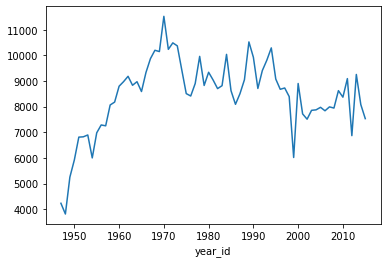

In [0]:
copy[copy["fran_id"]=="Knicks"].groupby("year_id")["pts"].sum().plot()

You can also create other types of plots, like a **bar plot**:

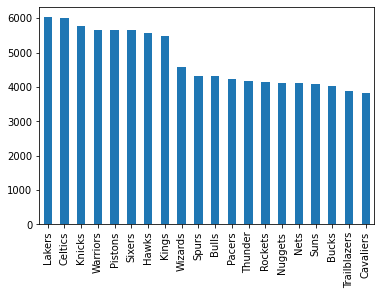

In [0]:
copy["fran_id"].value_counts().head(20).plot(kind="bar")

The Lakers are leading the Celtics by a minimal edge, and there are six further teams with a game count above 4000.

###  In 2013, the Miami Heat won the championship. Create a pie plot showing the count of their wins and losses during that season?

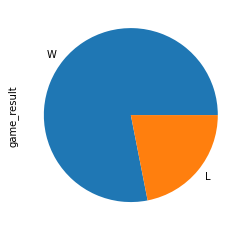

In [0]:
copy[
     (copy["year_id"]==2013) &
     (copy["fran_id"]=="Heat")
     ]["game_result"].value_counts().plot(kind="pie")

The slice of wins is significantly larger than the slice of losses!

## Conclusion

In this tutorial, you’ve learned how to start exploring a dataset with the Pandas Python library. You saw how you could access specific rows and columns to tame even the largest of datasets. Speaking of taming, you’ve also seen multiple techniques to prepare and clean your data, by specifying the data type of columns, dealing with missing values, and more. You’ve even created queries, aggregations, and plots based on those.

Now you can:


*   Work with Series and DataFrame objects
*   Subset your data with .loc, .iloc, and the indexing operator
*   Answer questions with queries, grouping, and aggregation
*   Handle missing, invalid, and inconsistent data
*   Visualize your dataset in a Jupyter notebook